In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
customers = pd.read_csv("customers.csv")

In [ ]:
customers.head()

In [13]:
products = pd.read_csv("Products.csv")

In [14]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [15]:
transactions = pd.read_csv("Transactions.csv")

In [17]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [18]:
# Get basic statistics for numerical columns
customers.describe()


,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2022-04-16
freq,1,1,59,3


In [21]:
# Check unique categories in columns like 'Region', 'Category'
print(customers['Region'].unique())



['South America' 'Asia' 'North America' 'Europe']


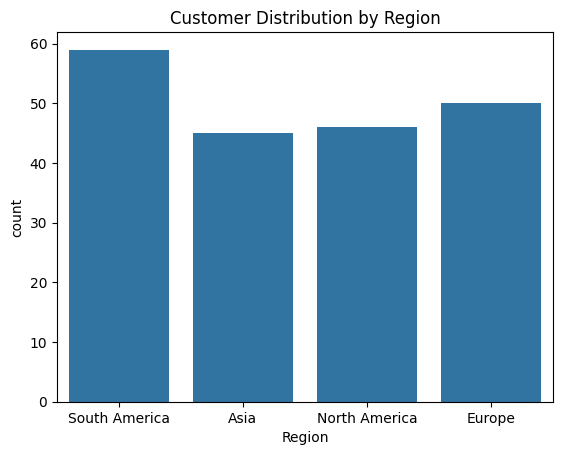

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count customers by Region
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.show()


In [23]:
# Display basic information about the dataset
transactions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [24]:
# Display the first few rows of the data
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [25]:
# Get a statistical summary of numerical columns
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [26]:
# To Check for any missing or null values
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

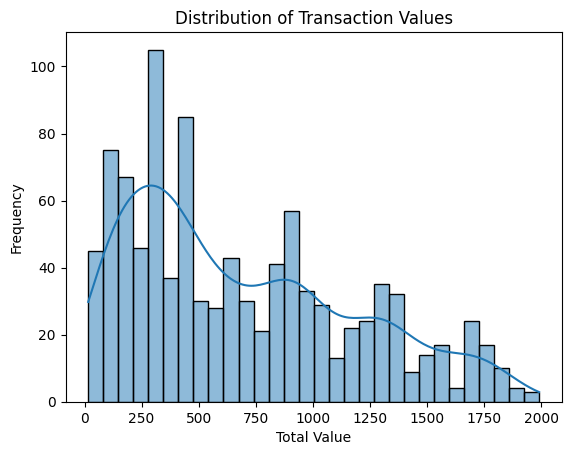

In [27]:
# Plot distribution of transaction values
sns.histplot(transactions['TotalValue'], kde=True, bins=30)
plt.title('Distribution of Transaction Values')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()

In [28]:
# Convert TransactionDate to datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [29]:
# Extract the year and month from the date
transactions['Year'] = transactions['TransactionDate'].dt.year
transactions['Month'] = transactions['TransactionDate'].dt.month

In [30]:
# Group by Year and Month to count transactions
monthly_transactions = transactions.groupby(['Year', 'Month']).size()

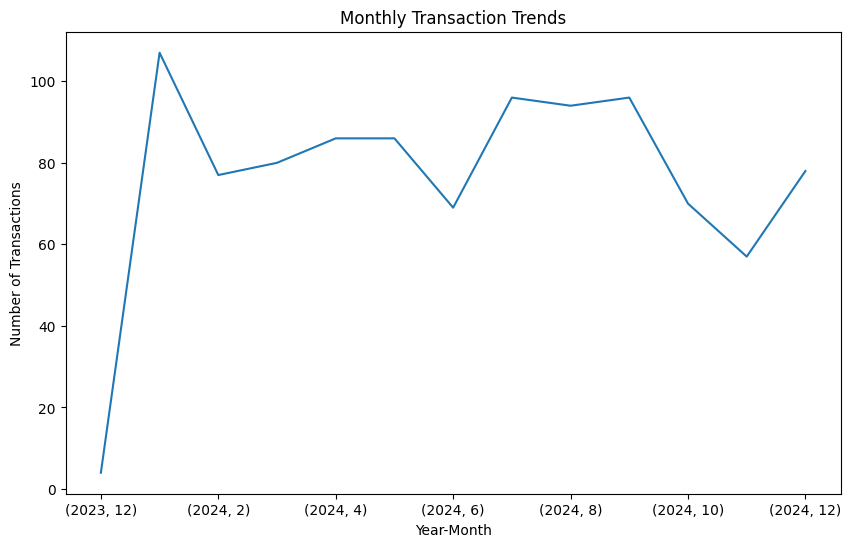

In [31]:
# Plot the number of transactions per month
monthly_transactions.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Transaction Trends')
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.show()

In [32]:
# Group by Year and Month and sum the total value
monthly_sales = transactions.groupby(['Year', 'Month'])['TotalValue'].sum()

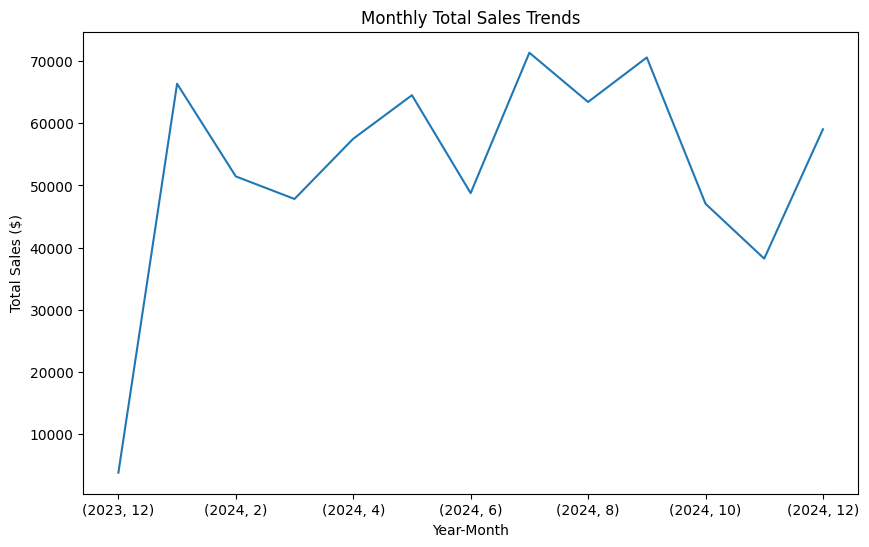

In [33]:
# Plot the total sales per month
monthly_sales.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Total Sales Trends')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales ($)')
plt.show()

In [34]:
#Now perform EDA on products dataset
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [35]:
# Display the first few rows of the data
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [36]:
# Get a statistical summary of numerical columns (Price)
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [37]:
# Check for any missing values
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

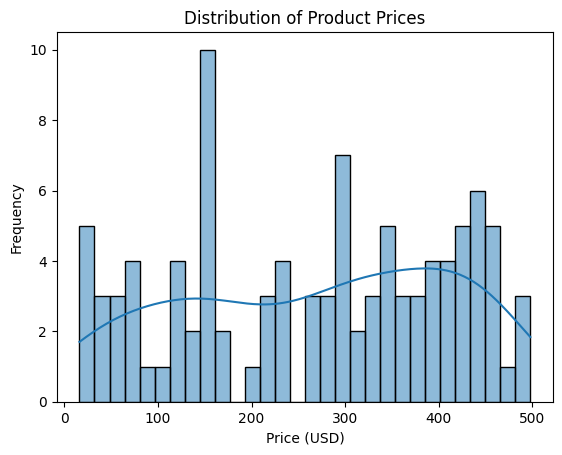

In [38]:
# Plot the distribution of product prices
sns.histplot(products['Price'], kde=True, bins=30)
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

In [39]:
# Count the number of products in each category
category_counts = products['Category'].value_counts()

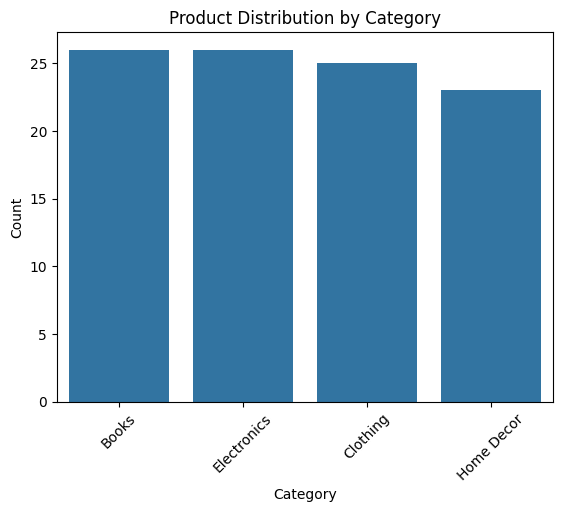

In [40]:
# Plot the distribution of products by category
sns.countplot(data=products, x='Category', order=category_counts.index)
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

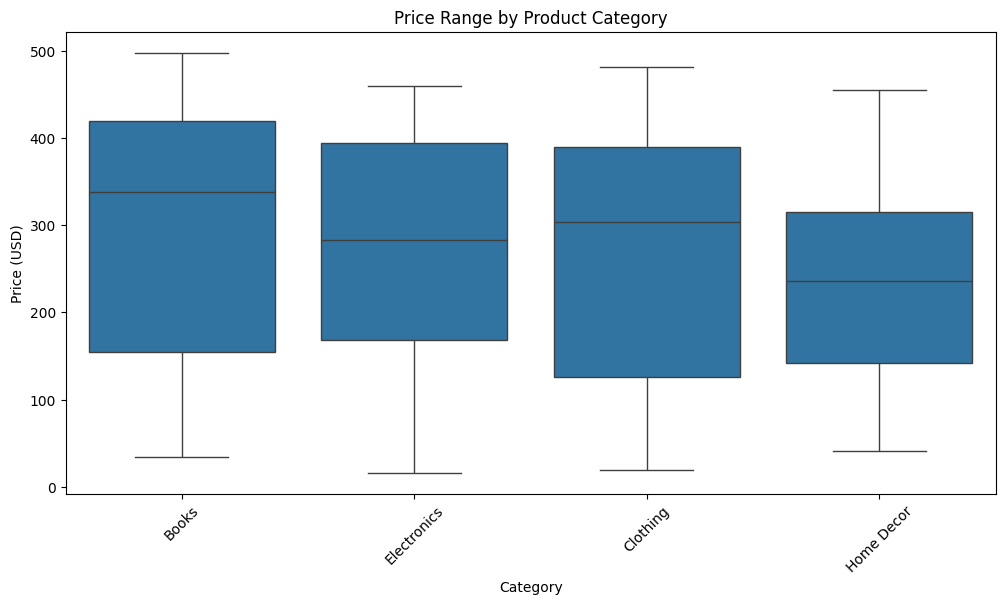

In [41]:
# Plot the price distribution by category
plt.figure(figsize=(12, 6))
sns.boxplot(data=products, x='Category', y='Price', order=category_counts.index)
plt.title('Price Range by Product Category')
plt.xlabel('Category')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

In [ ]:
# Step 1: Load the datasets
customers = pd.read_csv('customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [ ]:
# Step 2: Merge customers with transactions and products to get a consolidated dataframe
customer_transactions = pd.merge(transactions, customers[['CustomerID', 'Region']], on='CustomerID', how='left')
customer_transactions = pd.merge(customer_transactions, products[['ProductID', 'Category', 'Price']], on='ProductID', how='left')

In [ ]:
# Step 3: Feature Engineering - Transaction Profile (Product Categories Purchased)
transaction_matrix = customer_transactions.groupby(['CustomerID', 'Category']).size().unstack(fill_value=0)

In [ ]:
# Step 4: Customer Profile Features (Region and Signup Date)
customers['Region'] = customers['Region'].map({'North America': 1, 'Europe': 2, 'Asia': 3, 'Africa': 4, 'South America': 5})  # Encoding Region
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year
profile_features = customers[['Region', 'SignupYear']]

In [ ]:
# Step 5: Standardize the Customer Profile Features (Region and SignupYear)
scaler = StandardScaler()
profile_features_scaled = scaler.fit_transform(profile_features)

In [ ]:
# Step 6: Compute Cosine Similarity between Customers based on Transaction History
transaction_similarity = cosine_similarity(transaction_matrix)

In [ ]:
# Step 7: Compute Cosine Similarity based on Customer Profile Features
profile_similarity = cosine_similarity(profile_features_scaled)

In [ ]:
# Step 8: Combine Both Similarity Matrices (Weighted)
final_similarity_matrix = 0.7 * transaction_similarity + 0.3 * profile_similarity  # You can adjust the weights

In [ ]:
# Step 9: Function to Recommend Top 3 Lookalike Customers for a Given Customer
def get_top_lookalikes(customer_id, similarity_matrix, top_n=3):
    customer_index = customers[customers['CustomerID'] == customer_id].index[0]
    similarity_scores = similarity_matrix[customer_index]
    similar_customers = np.argsort(similarity_scores)[::-1][1:top_n+1]  # Exclude the customer itself
    top_lookalikes = [(customers.iloc[i]['CustomerID'], similarity_scores[i]) for i in similar_customers]
    return top_lookalikes

In [ ]:
# Step 10: Generate Lookalike Recommendations for the First 20 Customers
lookalike_map = {}
for customer_id in customers['CustomerID'][:20]:  # For customers C0001 - C0020
    top_lookalikes = get_top_lookalikes(customer_id, final_similarity_matrix)
    lookalike_map[customer_id] = [(lookalike[0], round(lookalike[1], 4)) for lookalike in top_lookalikes]

In [ ]:
# Step 11: Save Lookalike Map as Lookalike.csv
lookalike_df = pd.DataFrame({
    'CustomerID': lookalike_map.keys(),
    'Lookalikes': [str(value) for value in lookalike_map.values()]  # Save the list as a string
})

lookalike_df.to_csv('Lookalike.csv', index=False)

In [ ]:
#Task 3
import pandas as pd
# Load datasets
customers_df = pd.read_csv("Customers.csv")
transactions_df = pd.read_csv("Transactions.csv")

In [ ]:
# Merge Customers and Transactions data
data = pd.merge(transactions_df, customers_df, on="CustomerID", how="left")

In [ ]:
# Convert necessary columns
data['SignupDate'] = pd.to_datetime(data['SignupDate'])
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

In [ ]:
print(data.head())